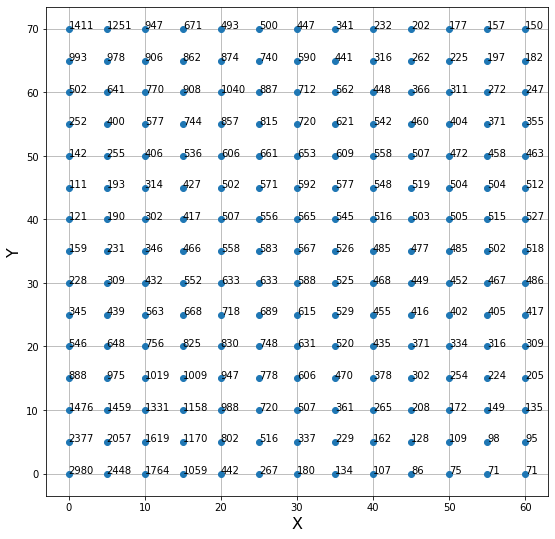

In [41]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import inpaint
%matplotlib inline



x = []
y = []
z = []

with open("example2_dec.csv") as f:
    reader = csv.reader(f)
    for row in [row for row in reader]:
        x.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
x = [int(r) for r in x[1:]]
x.insert(0, 0)


margin = 5
width = max(x) // margin
height = max(y) // margin
img = np.zeros([height + 1, width + 1])
mask = np.ones([height + 1, width + 1])


for i in range(len(z)):
    img[y[i] // margin][x[i] // margin] = z[i]
    mask[y[i] // margin][x[i] // margin] = 0

image_result = inpaint.inpaint_biharmonic(img, mask, multichannel=False).T

nX, nY = np.where(image_result)
nX *= margin
nY *= margin
image_result = image_result.astype(np.int64).reshape(-1)


plt.figure(figsize=(9, 9))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.grid()
plt.plot(nX, nY, marker='o', linestyle='')


for i in range(len(image_result)):
    plt.text(nX[i], nY[i], str(image_result[i]))
